In [122]:
#importing libraries 
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error as MSLE


warnings.filterwarnings("ignore")

In [81]:
#reading the dataset and converting to dataframe using pandas
train_data= pd.read_csv(r'C:\Users\Harshpalsingh\Downloads\train_data.csv')
test_data= pd.read_csv(r'C:\Users\Harshpalsingh\Downloads\test_data.csv')

In [82]:
train_data

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [83]:
test_data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


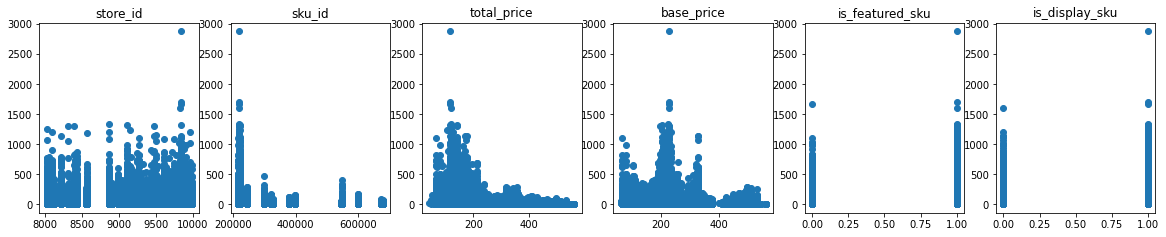

In [84]:
fig, (ax1, ax2, ax3,ax4, ax5, ax6) = plt.subplots(ncols=6, figsize=(20, 3.5))

ax1.scatter(train_data['store_id'], train_data['units_sold'])
ax1.set_title("store_id")
ax2.scatter(train_data['sku_id'], train_data['units_sold'])
ax2.set_title("sku_id")
ax3.scatter(train_data['total_price'], train_data['units_sold'])
ax3.set_title("total_price")
ax4.scatter(train_data['base_price'], train_data['units_sold'])
ax4.set_title("base_price")
ax5.scatter(train_data['is_featured_sku'], train_data['units_sold'])
ax5.set_title("is_featured_sku")
ax6.scatter(train_data['is_display_sku'], train_data['units_sold'])
ax6.set_title("is_display_sku")


plt.show()

##### Assumption of Linear Regression None of them shows linear relationship with target feature so we need to transform the data

In [85]:
#checking Multicollinerty

In [86]:
corr=train_data.corr()

<AxesSubplot:>

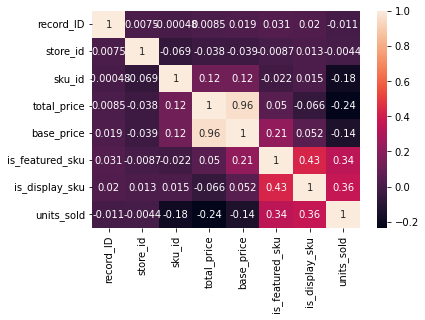

In [87]:
sns.heatmap(corr,annot=True)

#### We can clearly see through the heatmap that base_price and total_price are highly correlated so we will drop one of them.

In [88]:
#Deleting null values
train_data=train_data.dropna(axis=0)

In [89]:
train_data=train_data.drop('base_price',axis=1)

In [90]:
test_data=test_data.drop('base_price',axis=1)

In [91]:
x_train = train_data.loc[:, train_data.columns != 'units_sold'].values


In [92]:
# Target column (Units sold)
y_train = train_data.loc[:,"units_sold"].values

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

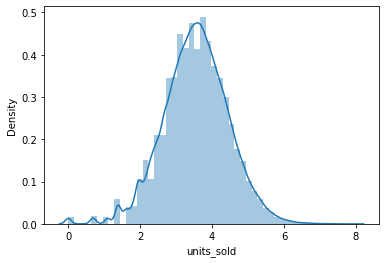

In [93]:
sns.distplot(np.log(train_data['units_sold']))


In [94]:
import statsmodels.api as sm

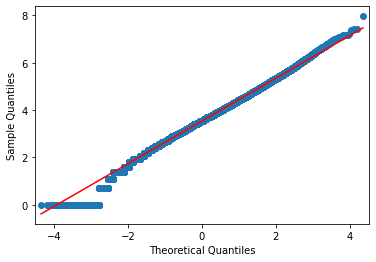

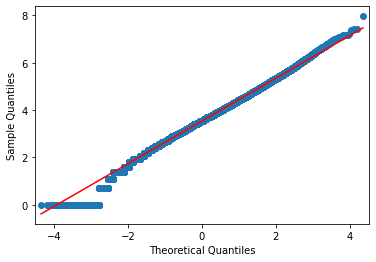

In [95]:
sm.qqplot(np.log(train_data['units_sold']), line='s')

In [96]:
train_data['units_sold'] = np.log(train_data['units_sold'])

In [97]:
np.percentile(train_data['units_sold'], 99.7)

6.0867747269123065

In [150]:
train_data_outlier=train_data[train_data['units_sold']> np.percentile(train_data['units_sold'], 99.7)]

In [151]:
train_data_outlier[(train_data_outlier['is_featured_sku'] == 1) | (train_data_outlier['is_display_sku'] == 1)]

,record_ID,week,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold
4636,6580,14/02/11,8095,219009,117.5625,1,1,7.095893
4657,6605,14/02/11,8094,219009,118.2750,1,1,6.523562
4677,6629,14/02/11,8063,219009,116.8500,1,1,6.278521
4697,6656,14/02/11,8023,219009,118.2750,1,1,7.128496
4698,6657,14/02/11,8023,219029,175.9875,0,1,6.434547
...,...,...,...,...,...,...,...,...
149110,211156,09/07/13,8222,222087,163.1625,1,1,6.190315
149294,211422,09/07/13,8869,222087,162.4500,1,1,6.381816
149384,211543,09/07/13,9112,222087,163.1625,1,1,6.498282
149799,212142,09/07/13,9613,222087,163.1625,1,1,6.295266


#### Most of the outliers are with is_featured_sku = 1 and is_display_sku =1

In [152]:
# Converting to datetime feature
train_data['week'] = pd.to_datetime(train_data['week'], format= '%d/%m/%y')

In [153]:
# Extracting date related features
train_data['week_'] = train_data['week'].dt.week
train_data['month'] = train_data['week'].dt.month
train_data['quarter'] = train_data['week'].dt.quarter
train_data.drop('week', axis = 1, inplace = True)

<AxesSubplot:>

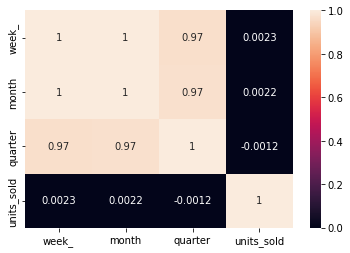

In [154]:
# There is no correlation of week_, month and quarter with units_sold
sns.heatmap(train_data[['week_','month','quarter','units_sold']].corr(),annot=True)

In [155]:
# One hot encoding
train_data = pd.get_dummies(data=train_data, columns=[ 'week_','month','quarter','sku_id', 'store_id'],
                    drop_first=True)

In [156]:
train_data.reset_index(drop=True).head()

,record_ID,total_price,is_featured_sku,is_display_sku,units_sold,week__2,week__3,week__4,week__5,week__6,...,store_id_9872,store_id_9876,store_id_9879,store_id_9880,store_id_9881,store_id_9890,store_id_9909,store_id_9954,store_id_9961,store_id_9984
0,1,99.0375,0,0,2.995732,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,99.0375,0,0,3.332205,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,133.9500,0,0,2.944439,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,133.9500,0,0,3.784190,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,141.0750,0,0,3.951244,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
train_data.drop('record_ID',axis=1).head()

,total_price,is_featured_sku,is_display_sku,units_sold,week__2,week__3,week__4,week__5,week__6,week__7,...,store_id_9872,store_id_9876,store_id_9879,store_id_9880,store_id_9881,store_id_9890,store_id_9909,store_id_9954,store_id_9961,store_id_9984
0,99.0375,0,0,2.995732,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,99.0375,0,0,3.332205,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,133.9500,0,0,2.944439,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,133.9500,0,0,3.784190,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,141.0750,0,0,3.951244,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
train_data = train_data[np.isfinite(train_data).all(1)]


In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [160]:
train_data_x = train_data.drop('units_sold',axis=1)
train_data_y = train_data['units_sold']

In [161]:
# Train and Test data split based on is_featured_sku and is_display_sku
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(train_data_x, train_data_y, train_size= 0.7, random_state=22,
                                                   stratify= train_data_x[['is_featured_sku', 'is_display_sku']] )

In [162]:
df_train_x[['is_featured_sku', 'is_display_sku']].value_counts(normalize = True)*100

is_featured_sku  is_display_sku
0                0                 82.651469
                 1                  7.787525
1                1                  5.532615
                 0                  4.028391
dtype: float64

In [163]:
df_test_x[['is_featured_sku', 'is_display_sku']].value_counts(normalize = True)*100

is_featured_sku  is_display_sku
0                0                 82.650683
                 1                  7.787768
1                1                  5.532246
                 0                  4.029304
dtype: float64

In [164]:
#Standard Scaling
df_train_x = scaler.fit_transform(df_train_x)
df_test_x = scaler.transform(df_test_x)

In [260]:
#Model Implementation
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(df_train_x, df_train_y) ## Model Training
predictions = LR.predict(df_test_x)

In [261]:
print("Root Mean squared error test",np.sqrt(MSLE(df_test_y,predictions,squared=False)))
print("Root Mean squared error train",np.sqrt(MSLE(df_train_y,LR.predict(df_train_x),squared=False)))

Root Mean squared error test 0.38332890655289714
Root Mean squared error train 0.38623341492725977


In [294]:
new_train_data= pd.read_csv(r'C:\Users\Harshpalsingh\Downloads\train_data.csv')


In [295]:
new_train_data=new_train_data.dropna(axis=0)

In [265]:
df_x_train = new_train_data.drop(['record_ID', 'base_price','units_sold'], axis =1)
df_y_train = new_train_data['units_sold']

In [266]:
#Loading Testdata set file
final_test = pd.read_csv(r'C:\Users\Harshpalsingh\Downloads\test_data.csv')
final_test

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0
...,...,...,...,...,...,...,...,...
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0


In [267]:
final_test_x = final_test.drop(['record_ID','base_price'], axis =1)

In [269]:
# Combining Train & Test data
df_x = pd.concat([df_x_train, final_test_x]).reset_index(drop = True)
df_x

,week,store_id,sku_id,total_price,is_featured_sku,is_display_sku
0,17/01/11,8091,216418,99.0375,0,0
1,17/01/11,8091,216419,99.0375,0,0
2,17/01/11,8091,216425,133.9500,0,0
3,17/01/11,8091,216233,133.9500,0,0
4,17/01/11,8091,217390,141.0750,0,0
...,...,...,...,...,...,...
164004,01/10/13,9984,223245,241.5375,0,0
164005,01/10/13,9984,223153,240.8250,0,0
164006,01/10/13,9984,245338,382.6125,1,1
164007,01/10/13,9984,547934,191.6625,0,0


In [270]:
# Extracting date related features
df_x['week'] = pd.to_datetime(df_x['week'], format= '%d/%m/%y')
df_x['week_'] = df_x['week'].dt.week
df_x['month'] = df_x['week'].dt.month
df_x['quarter'] = df_x['week'].dt.quarter
df_x.drop('week', axis = 1, inplace = True)

In [271]:
# One hot encoding
df_x = pd.get_dummies(data=df_x, columns=[ 'week_','month','quarter','sku_id', 'store_id'],
                    drop_first=True)
df_x.shape

(164009, 170)

In [297]:
df_x = df_x[np.isfinite(df_x).all(1)]


In [298]:
# Standard Scaling of features
scaler = StandardScaler()
df_x_train = df_x[:150149][:]
df_x_train = scaler.fit_transform(df_x_train)

df_x_test = df_x[150149: ][:]
df_x_test = scaler.transform(df_x_test)

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

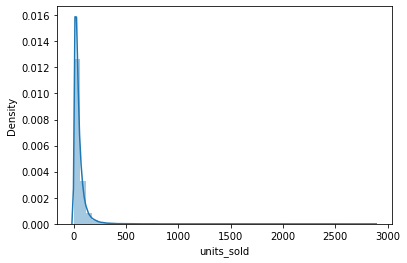

In [299]:
sns.distplot(df_y_train)

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

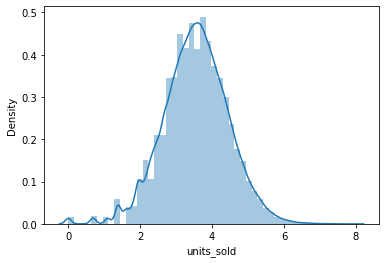

In [300]:
sns.distplot(np.log(df_y_train))

In [346]:
df_y_train = np.log(df_y_train)

In [355]:
LR = LinearRegression()
LR.fit(df_x_train,df_y_train) ## Model Training
predictions = LR.predict(df_x_test)
print('Root Mean squared error train: ', np.sqrt(MSLE(df_y_train,LR.predict(df_x_train), squared= False)))

Root Mean squared error train:  0.385378982286887


In [352]:
final_test['units_sold'] = np.exp(predictions).round()

In [353]:
final_test['units_sold'] = final_test['units_sold'].astype('int64') 


In [354]:
final_test

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0,27
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0,23
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0,13
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0,21
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0,20
...,...,...,...,...,...,...,...,...,...
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0,27
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0,21
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1,48
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0,8
